#### Forecasting Bike Sales Revenue

##### Import library

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

##### Import dataset and preprocess

In [138]:
df = pd.read_csv('EuropeBikeSales.csv')
df = df[['Date', 'Revenue']]

# Group by Date và tính tổng Revenue
grouped_df = df.groupby('Date').sum().reset_index()

# Chuyển đổi cột 'Date' thành kiểu datetime với định dạng 'dd/mm/yyyy'
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'], format='%d/%m/%Y')

# Sắp xếp DataFrame theo cột 'Date'
df_sorted = grouped_df.sort_values(by='Date')

# In ra kết quả
print(df_sorted)

grouped_df.set_index('Date', inplace=True)

df = grouped_df.sort_index()
df

           Date  Revenue
0    2011-01-01    12821
682  2011-01-02    11868
1358 2011-01-03    31175
1512 2011-01-04    18909
1574 2011-01-05     4675
...         ...      ...
1231 2016-07-27    14094
1293 2016-07-28    19102
1349 2016-07-29    19329
1467 2016-07-30    14761
1507 2016-07-31    25570

[1884 rows x 2 columns]


,Revenue
Date,
2011-01-01,12821
2011-01-02,11868
2011-01-03,31175
2011-01-04,18909
2011-01-05,4675
...,...
2016-07-27,14094
2016-07-28,19102
2016-07-29,19329


In [139]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2016-07-22', '2016-07-23', '2016-07-24', '2016-07-25',
               '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29',
               '2016-07-30', '2016-07-31'],
              dtype='datetime64[ns]', name='Date', length=1884, freq=None)

##### Biểu đồ dữ liệu

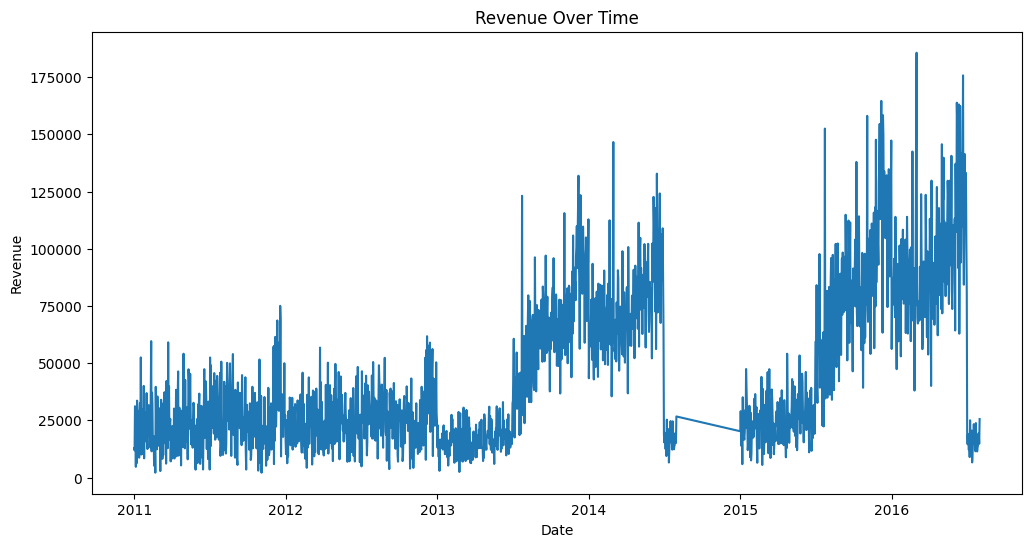

In [140]:
# Assuming you have a DataFrame 'df' with a 'Revenue' column
plt.figure(figsize=(12, 6))
plt.plot(df['Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

##### Kiểm tra chuỗi dừng và xử lí

In [141]:
from statsmodels.tsa.stattools import adfuller, kpss

# Kiểm định ADF
adf_result = adfuller(df_sorted['Revenue'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Diễn giải kết quả ADF
if adf_result[1] > 0.05:
    print("Chuỗi không dừng (không bác bỏ H0)")
else:
    print("Chuỗi dừng (bác bỏ H0)")

# Kiểm định KPSS
kpss_result = kpss(df_sorted['Revenue'], regression='c')
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

# Diễn giải kết quả KPSS
if kpss_result[1] < 0.05:
    print("Chuỗi không dừng (bác bỏ H0)")
else:
    print("Chuỗi dừng (không bác bỏ H0)")


ADF Statistic: -2.546381
p-value: 0.104593
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Chuỗi không dừng (không bác bỏ H0)
KPSS Statistic: 3.303394
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Chuỗi không dừng (bác bỏ H0)


C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_15784\2410474986.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_sorted['Revenue'], regression='c')


In [142]:
# Lấy sai phân bậc 1 của chuỗi thời gian
revenue_diff = df_sorted['Revenue'].diff().dropna()

# Kiểm tra lại tính dừng với ADF và KPSS
adf_result_diff = adfuller(revenue_diff)
kpss_result_diff = kpss(revenue_diff, regression='c')


C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_15784\864755715.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(revenue_diff, regression='c')


In [143]:
# Kiểm định ADF trên chuỗi đã lấy sai phân
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Diễn giải kết quả ADF cho chuỗi đã lấy sai phân
if adf_result_diff[1] > 0.05:
    print("Chuỗi không dừng (không bác bỏ H0)")
else:
    print("Chuỗi dừng (bác bỏ H0)")

# Kiểm định KPSS trên chuỗi đã lấy sai phân
print('KPSS Statistic: %f' % kpss_result_diff[0])
print('p-value: %f' % kpss_result_diff[1])
print('Critical Values:')
for key, value in kpss_result_diff[3].items():
    print('\t%s: %.3f' % (key, value))

# Diễn giải kết quả KPSS cho chuỗi đã lấy sai phân
if kpss_result_diff[1] < 0.05:
    print("Chuỗi không dừng (bác bỏ H0)")
else:
    print("Chuỗi dừng (không bác bỏ H0)")


ADF Statistic: -20.310364
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Chuỗi dừng (bác bỏ H0)
KPSS Statistic: 0.052832
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Chuỗi dừng (không bác bỏ H0)


In [144]:
# Split the data into training & testing sets by 7:3
train_size = int(0.7 * len(df['Revenue']))
test_size = len(df['Revenue']) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]


##### Model autoARIMA

In [145]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Revenue'])

# Find the best ARIMA model using auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28814.539, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29493.854, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29133.996, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28814.059, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29491.855, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28815.687, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28811.564, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28812.631, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=28812.211, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=28815.158, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=28809.542, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=28812.044, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=28810.627, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=28810.207, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [146]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Revenue'])
y_pred = model.predict(n_periods=len(y_test))

In [147]:
# Tạo một chỉ số mới cho 30 ngày tiếp theo
last_date = pd.to_datetime(df.index[-1])
next_30_days = pd.date_range(start=last_date, periods=30, freq='D')

# Tạo một mảng của 30 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Dự đoán giá trị cho 30 ngày tiếp theo sử dụng mô hình ARIMA
y_next_30_days = model.predict(n_periods=len(x_next_30_days))


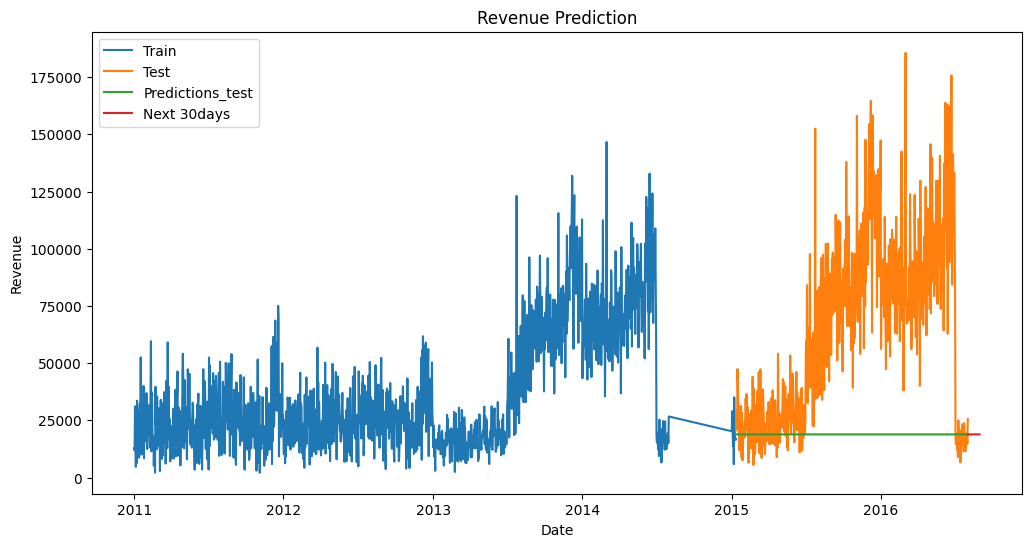

In [148]:
plt.figure(figsize=(12, 6))
# Plot the actual values and predicted values
plt.plot(train_data.index, train_data['Revenue'], label='Train')
plt.plot(test_data.index, test_data['Revenue'], label='Test')
plt.plot(test_data.index, y_pred, label='Predictions_test')
plt.plot(next_30_days, y_next_30_days, label='Next 30days')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.title('Revenue Prediction')
plt.show()

##### Tính độ chính xác của thuật toán

In [149]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - y_test))
print("MAE:", test_mae)


RMSE: 61674.68103697967
MAPE: 62.233619054494305
MAE: 48702.175472770905
